In [ ]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import datasets, Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


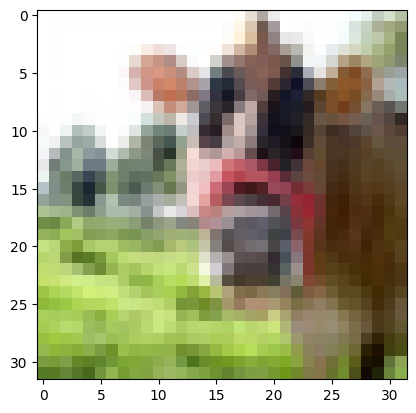

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

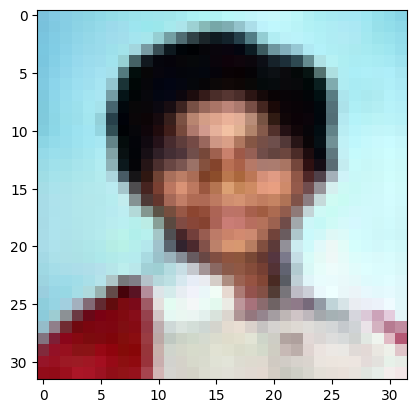

In [ ]:
plt.imshow(X_train[3])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
Xception_model = Sequential()

pretrained_model = tf.keras.applications.Xception(include_top=False,
                    weights="imagenet",
                    input_shape=(None),
                     pooling='avg',
                     classes=100,
                     classifier_activation="softmax",)
for layer in pretrained_model.layers:
        layer.trainable=False

Xception_model.add(pretrained_model)
Xception_model.add(Flatten())
Xception_model.add(Dense(256,activation='relu'))
Xception_model.add(Dense(256,activation='relu'))
Xception_model.add(Dense(256,activation='relu'))
Xception_model.add(Dense(256,activation='relu'))
Xception_model.add(Dense(100,activation='softmax'))

In [ ]:
Xception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 256)               524544    
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 100)              

In [ ]:
Xception_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = Xception_model.fit(X_train,y_train,epochs=50,validation_split=0.2,callbacks=callback)

Epoch 1/50
1250/1250 [==============================] - 18s 11ms/step - loss: 4.1296 - accuracy: 0.0625 - val_loss: 3.8739 - val_accuracy: 0.0954
Epoch 2/50
1250/1250 [==============================] - 13s 10ms/step - loss: 3.6650 - accuracy: 0.1264 - val_loss: 3.7023 - val_accuracy: 0.1280
Epoch 3/50
1250/1250 [==============================] - 13s 10ms/step - loss: 3.3875 - accuracy: 0.1756 - val_loss: 3.6521 - val_accuracy: 0.1476
Epoch 4/50
1250/1250 [==============================] - 13s 10ms/step - loss: 3.1270 - accuracy: 0.2254 - val_loss: 3.7327 - val_accuracy: 0.1507
Epoch 5/50
1250/1250 [==============================] - 13s 10ms/step - loss: 2.8607 - accuracy: 0.2800 - val_loss: 3.8438 - val_accuracy: 0.1518
Epoch 6/50
1250/1250 [==============================] - 13s 10ms/step - loss: 2.5939 - accuracy: 0.3370 - val_loss: 4.1685 - val_accuracy: 0.1464
Epoch 7/50
1250/1250 [==============================] - 13s 10ms/step - loss: 2.3625 - accuracy: 0.3915 - val_loss: 4.4794 -